# Linearity / Additivity / Homogeneity

## Two Different Meanings of "Linear"

In mathematics, the term **linear** can mean different things depending on context:

---

### 1️⃣ Graphing / school sense
- **Definition:** A "linear function" is any function whose **graph is a straight line**.  
- **Form:**  
  \[
  f(x) = m x + b
  \]  
- **Includes constants (`b ≠ 0`)**.  
- **Example:** `f(x) = 3x + 2` → straight line, "linear" in graphing sense.

---

### 2️⃣ Algebra / vector space sense
- **Definition:** A function \(f\) is **linear** if it satisfies **both**:
  1. **Additivity:** \(f(x + y) = f(x) + f(y)\)  
  2. **Homogeneity:** \(f(a x) = a f(x)\)  
- **Key restriction:** Must pass through the origin, i.e. \(f(0) = 0\).  
- **Form:**  
  \[
  f(x) = k x
  \]  
- **Example:** `f(x) = 3x` → linear  
- **Nonlinear (affine):** `f(x) = 3x + 2` → fails additivity/homogeneity

---

**💡 Takeaway:**  

> Graphically straight ≠ linear in algebra. Algebraic linearity is stricter: no constants, origin-preserving.


## Practice & Examples
### SymPy

In [63]:
import sympy as sp

from mlpeople.math import (
    is_additive,
    is_homogeneous,
    is_linear,
    is_affine,
    evaluate_function
)

In [64]:
v = 2
u = 3
c = 3

x = sp.symbols('x')
f_line= 3 * x + 2

fv_fu = evaluate_function(f_line, x, v).round() + evaluate_function(f_line, x, u).round()
fvu = evaluate_function(f_line, x, v+u).round()
fcu = evaluate_function(f_line, x, c*u).round()
cfu = c * evaluate_function(f_line, x, u).round()

print(f'fuction: {f_line}, v={v}, u={u}, f(v)+f(u)={fv_fu}, f(v+u)={fvu}')
print(f'fuction: {f_line}, c={c}, u={u}, f(cu)={fcu}, cf(u)={cfu}')

fuction: 3*x + 2, v=2, u=3, f(v)+f(u)=19, f(v+u)=17
fuction: 3*x + 2, c=3, u=3, f(cu)=29, cf(u)=33


In [9]:
x = sp.symbols('x')

f_linear= 3 * x
f_line= 3 * x + 2
f_quadr = x**2
f_sin= sp.sin(x)

print(f'{f_linear} additive: {is_additive(f_linear, x)}')
print(f'{f_linear} homogeneous: {is_homogeneous(f_linear, x)}')
print(f'{f_linear} linear: {is_linear(f_linear, x)}')
print(f'{f_linear} affine: {is_affine(f_linear, x)}')

print(f'{f_line} additive: {is_additive(f_line, x)}')
print(f'{f_line} homogeneous: {is_homogeneous(f_line, x)}')
print(f'{f_line} linear: {is_linear(f_line, x)}')
print(f'{f_line} affine: {is_affine(f_line, x)}')

print(f'{f_quadr} additive: {is_additive(f_quadr, x)}')
print(f'{f_quadr} homogeneous: {is_homogeneous(f_quadr, x)}')
print(f'{f_quadr} linear: {is_linear(f_quadr, x)}')
print(f'{f_quadr} affine: {is_affine(f_quadr, x)}')

print(f'{f_sin} additive: {is_additive(f_sin, x)}')
print(f'{f_sin} homogeneous: {is_homogeneous(f_sin, x)}')
print(f'{f_sin} linear: {is_linear(f_sin, x)}')
print(f'{f_sin} affine: {is_affine(f_sin, x)}')



3*x additive: True
3*x homogeneous: True
3*x linear: True
3*x affine: True
3*x + 2 additive: False
3*x + 2 homogeneous: False
3*x + 2 linear: False
3*x + 2 affine: True
x**2 additive: False
x**2 homogeneous: False
x**2 linear: False
x**2 affine: False
sin(x) additive: False
sin(x) homogeneous: False
sin(x) linear: False
sin(x) affine: False


### Pure Python

In [65]:
from mlpeople.math import (
    is_linear_numeric,
    is_affine_numeric,
)

In [66]:
import math

print(f'x+2 is affine: {is_affine_numeric(lambda x: x+2)}')
print(f'x+2 is linear: {is_linear_numeric(lambda x: x+2)}')

print(f'2x is affine: {is_affine_numeric(lambda x: x)}')
print(f'2x is linear: {is_linear_numeric(lambda x: x)}')

print(f'x^2 is affine: {is_affine_numeric(lambda x: x*x)}')
print(f'x^2 is linear: {is_linear_numeric(lambda x: x*x)}')

print(f'sin(x) is affine: {is_affine_numeric(lambda x: math.sin(x))}')
print(f'sin(x) is linear: {is_linear_numeric(lambda x: math.sin(x))}')

x+2 is affine: True
x+2 is linear: False
2x is affine: True
2x is linear: True
x^2 is affine: False
x^2 is linear: False
sin(x) is affine: False
sin(x) is linear: False


# Vector and Matrix — Short Definitions

### Vector
A **vector** is an ordered collection of numbers that represents a **point, direction, or magnitude**.
- Can be written as a column or row:
  \begin{bmatrix}
  1 \\
  2
  \end{bmatrix}
- In programming, a vector is usually a **1-D array**.
- Vectors support **addition** and **scalar multiplication**.
---
### Matrix
A **matrix** is a rectangular array of numbers arranged in **rows and columns**.
- Example:
  \begin{bmatrix}
  1 & 2 \\
  3 & 4
  \end{bmatrix}
- In programming, a matrix is a **2-D array**.
- Matrices are commonly used to represent **linear transformations**.
---
### Relationship
- A **matrix transforms a vector**.
- A **vector can be seen as a matrix with one column**.
---
### Intuition
- **Vector** → an arrow or point in space  
- **Matrix** → a machine that moves or reshapes arrows

# Vectors and Matrices with NumPy

### Creating vectors. Column vs row vector

In [67]:
import numpy as np

# Vector as a 1D NumPy array
v = np.array([1, 2, 3])

print("Vector v:")
print(v)
print("Shape:", v.shape)

# Row vector
row_vec = np.array([[1, 2, 3]])

# Column vector
col_vec = np.array([[1],
                    [2],
                    [3]])

print("Row vector shape:", row_vec.shape)
print("Column vector shape:", col_vec.shape)

v1 = np.array([1, 2])
v2 = np.array([3, 4])


Vector v:
[1 2 3]
Shape: (3,)
Row vector shape: (1, 3)
Column vector shape: (3, 1)


### Vector operations

In [68]:
v1 = np.array([1, 2])
v2 = np.array([3, 4])

# Vector addition
print("v1 + v2 =", v1 + v2)

# Scalar multiplication
print("3 * v1 =", 3 * v1)


v1 + v2 = [4 6]
3 * v1 = [3 6]


### Creating matrices

In [69]:
# 2x2 matrix
A = np.array([[1, 2],
              [3, 4]])

print("Matrix A:")
print(A)
print("Shape:", A.shape)


Matrix A:
[[1 2]
 [3 4]]
Shape: (2, 2)


### Matrix–vector multiplication

In [70]:
v = np.array([1, 1])

result = A @ v   # '@' is matrix multiplication

print("A @ v =", result)


A @ v = [3 7]


### Matrix–matrix multiplication

In [71]:
B = np.array([[2, 0],
              [0, 2]])

print("A @ B =")
print(A @ B)


A @ B =
[[2 4]
 [6 8]]


### Identity matrix
a square matrix with 1s on its main diagonal (top-left to bottom-right) and 0s everywhere else

In [72]:
I = np.eye(2)

print("Identity matrix:")
print(I)

print("I @ v =", I @ v)


Identity matrix:
[[1. 0.]
 [0. 1.]]
I @ v = [1. 1.]


# Matrix Multiplication — Rules

 - Dimension rule
Matrix multiplication is defined only if **inner dimensions match**.

$$
A \in \mathbb{R}^{m \times n}, \quad
B \in \mathbb{R}^{n \times p}
\;\Rightarrow\;
AB \in \mathbb{R}^{m \times p}
$$

---

 - Order matters
$$
AB \neq BA \quad \text{(in general)}
$$

Matrix multiplication is **not commutative**.

---

 - How entries are computed
Each entry is a **dot product**:

$$
(AB)_{ij} = \sum_k A_{ik} B_{kj}
$$

---

 - Identity matrix
$$
AI = IA = A
$$

Acts like multiplying by `1`.

---

 - Algebraic properties
- **Associative:** $$ (AB)C = A(BC) $$
- **Distributive:** $$ A(B+C) = AB + AC $$
- **Scalars:** $$ \alpha(AB) = (\alpha A)B = A(\alpha B) $$

---

 - NumPy reminder
- `A @ B` → matrix multiplication  
- `A * B` → element-wise multiplication


# Determinant — Key Ideas

### What is the determinant?
The **determinant** is a single number associated with a **square matrix** that describes how the matrix transforms space.

- It measures **scaling of area (2D)** or **volume (3D)**.
- It tells whether a matrix is **invertible**.
- It encodes **orientation** (flip or no flip).

---

### When is the determinant defined?
Only for **square matrices**:

$$
A \in \mathbb{R}^{n \times n}
$$

---

### Determinant of a 2×2 matrix
For
$$
A =
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

the determinant is

$$
\det(A) = ad - bc
$$

---

### Determinant of a 3×3 matrix (idea)
Computed by expansion into smaller determinants:

$$
\det(A) =
a_{11}
\begin{vmatrix}
a_{22} & a_{23} \\
a_{32} & a_{33}
\end{vmatrix}
- a_{12}
\begin{vmatrix}
a_{21} & a_{23} \\
a_{31} & a_{33}
\end{vmatrix}
+ a_{13}
\begin{vmatrix}
a_{21} & a_{22} \\
a_{31} & a_{32}
\end{vmatrix}
$$

---

### Key properties

 - Invertibility
$$
\det(A) \neq 0 \iff A \text{ is invertible}
$$

If `det(A) = 0`, rows (or columns) are **linearly dependent**.

---

 - Geometric meaning

The determinant describes how a matrix scales space.

$$
|\det(A)| \quad \text{= area (2D) or volume (3D) scaling factor}
$$

$$
\det(A) < 0 \quad \text{= orientation flip}
$$

$$
\det(A) = 0 \quad \text{= space collapsed to lower dimension}
$$

---

 - Multiplication rule
$$
\det(AB) = \det(A)\det(B)
$$

---

 - Effect of row operations
    - Swap two rows → determinant changes sign
    - Multiply a row by \(k\) → determinant multiplies by \(k\)
    - Add multiple of one row to another → determinant unchanged

---

## Identity and zero matrices
$$
\det(I) = 1, \quad \det(0) = 0
$$

---

## Intuition
- **Matrix** → transformation
- **Determinant** → how much space is stretched or squashed

If the determinant is zero, the transformation **loses information**.


In [73]:
# Matrix 2x2
A_2x2 = np.array([[1, 2],
                  [3, 4]])

# Matrix 3x3
A_3x3 = np.array([[7, 5, 5],
                  [4, 2, 6],
                  [7, 1, 9]])

# Singular Matrix 3x3
A_3x3_singular = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Calculating determinants
det_2x2 = np.linalg.det(A_2x2).round(2)
det_3x3 = np.linalg.det(A_3x3).round(2)
det_3x3_singular = np.linalg.det(A_3x3_singular).round(2)

det_2x2, det_3x3, det_3x3_singular


(np.float64(-2.0), np.float64(64.0), np.float64(-0.0))

# Degenerate, Transposed, and Inverse Matrices

---

### Degenerate (Singular) Matrix

A **degenerate matrix** (also called **singular**) is a **square matrix that is not invertible**.

- Condition:
$$
A \in \mathbb{R}^{n \times n}, \quad \det(A) = 0
$$

- Properties:
  - Rows or columns are **linearly dependent**
  - Cannot solve \(A \mathbf{x} = \mathbf{b}\) uniquely
  - Space collapses (volume = 0)

- Opposite: **non-degenerate / regular / invertible matrix**  
  $$\det(A) \neq 0$$

---

### Transposed Matrix

The **transpose** of a matrix \(A\) is a new matrix \(A^T\) obtained by **swapping rows and columns**.

- Definition:
$$
(A^T)_{ij} = A_{ji}
$$

- Example:
$$
A = 
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}, \quad
A^T = 
\begin{bmatrix}
1 & 3 \\
2 & 4
\end{bmatrix}
$$

- Properties:
  - \((A^T)^T = A\)
  - \((A + B)^T = A^T + B^T\)
  - \((AB)^T = B^T A^T\)
  - \((kA)^T = k A^T\)  (scalar multiplication)

---

### Inverse Matrix

The **inverse** of a square matrix \(A\) is a matrix \(A^{-1}\) such that:

$$
A A^{-1} = A^{-1} A = I
$$

- Only **non-degenerate matrices** have inverses det(A) != 0
- Example for 2×2:

$$
A = 
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}, \quad
A^{-1} = \frac{1}{ad-bc} 
\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

- Properties:
  - \((A^{-1})^{-1} = A\)
  - \((AB)^{-1} = B^{-1} A^{-1}\)
  - \((A^T)^{-1} = (A^{-1})^T\)

---

### Summary Table

| Concept | Symbol | Key Property |
|---------|--------|--------------|
| Degenerate / Singular | \(A\) | \(\det(A) = 0\), not invertible |
| Transposed | \(A^T\) | Swap rows and columns |
| Inverse | \(A^{-1}\) | \(A A^{-1} = I\), exists only if \(det(A) != 0\) |


In [74]:
# Degenerate matrix
A = np.array([[2, 4], [1, 2]])
print("\nDegenerate matrix:")
print(A)
print("Determinant of degenerate matrix:", np.linalg.det(A))


Degenerate matrix:
[[2 4]
 [1 2]]
Determinant of degenerate matrix: 0.0


In [75]:
A = np.array([[2, 4], [7, 2]])
I = np.eye(2)

# Transposition
A_T = A.T

# Calculating the inverse of a matrix
C = np.array([[1, 2], [3, 4]])
C_inv = np.linalg.inv(C)
С_mul_C_inv = np.dot(C, C_inv)

print("Original matrix A", A, sep='\n')
print("Transposed matrix A", A_T, sep='\n')
print("Original matrix C", C, sep='\n')
print("Inverse matrix C", C_inv, sep='\n')
print("The result of multiplying the matrix by its inverse matrix", np.round(С_mul_C_inv, 2) , sep='\n')


Original matrix A
[[2 4]
 [7 2]]
Transposed matrix A
[[2 7]
 [4 2]]
Original matrix C
[[1 2]
 [3 4]]
Inverse matrix C
[[-2.   1. ]
 [ 1.5 -0.5]]
The result of multiplying the matrix by its inverse matrix
[[1. 0.]
 [0. 1.]]


# Scalar Product (Dot Product)

The **scalar product** of two vectors u and v is a single number:

$$
u \cdot v = \sum_{i=1}^{n} u_i v_i = |u| \, |v| \, \cos \theta
$$

- **Magnitude-based:** measures how much vectors point in the same direction  
- **Geometric meaning:**
  - $> 0$ → acute angle  
  - $= 0$ → perpendicular (orthogonal)  
  - $< 0$ → obtuse angle  

**Key properties:**
- Commutative: $u \cdot v = v \cdot u$  
- Distributive: $u \cdot (v + w) = u \cdot v + u \cdot w$  
- Scalar multiplication: $(\alpha u) \cdot v = \alpha (u \cdot v)$  

**Common uses:**
- Compute **vector length**: $|u| = \sqrt{u \cdot u}$  
- Determine **angle between vectors**: $\cos \theta = \frac{u \cdot v}{|u||v|}$  
- Check **orthogonality**: $u \cdot v = 0$  
- In physics: measure **work done**: $W = F \cdot s$


In [76]:
# Vectors
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

# Scalar product
dot_product = np.dot(u, v)

print("Scalar product:", dot_product)


Scalar product: 32


# Vectors Visualizations

## 2D Visualiztion with sum and dot product

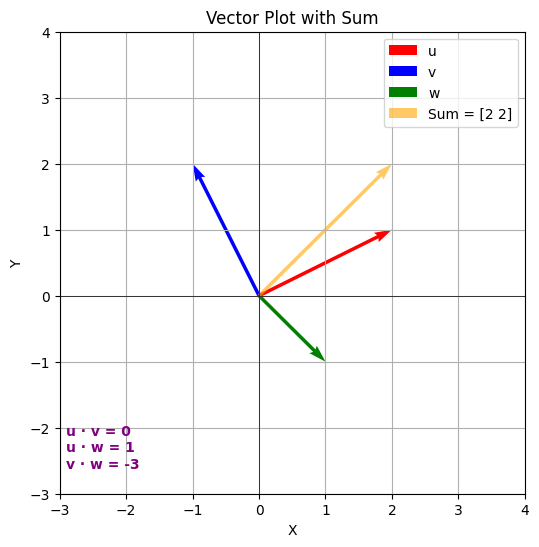

In [77]:
from mlpeople.math import plot_vectors

# Example usage
u = np.array([2, 1])
v = np.array([-1, 2])
w = np.array([1, -1])

plot_vectors(
    vectors=[u, v, w],
    labels=['u', 'v', 'w'],
    colors=['r', 'b', 'g'],
    show_sums=True,
    xlim=(-3, 4),
    ylim=(-3, 4),
    title='Vector Plot with Sum'
)


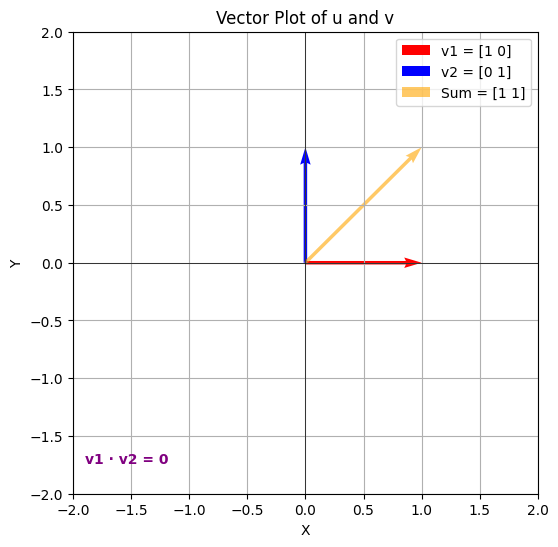

In [78]:
u = np.array([1, 0])
v = np.array([0, 1])

plot_vectors(
    vectors=[u, v],
    xlim=(-2, 2), ylim=(-2, 2),
    title='Vector Plot of u and v',
    show_sums=True,
    show_dot=True)

## 3D Visualiztion

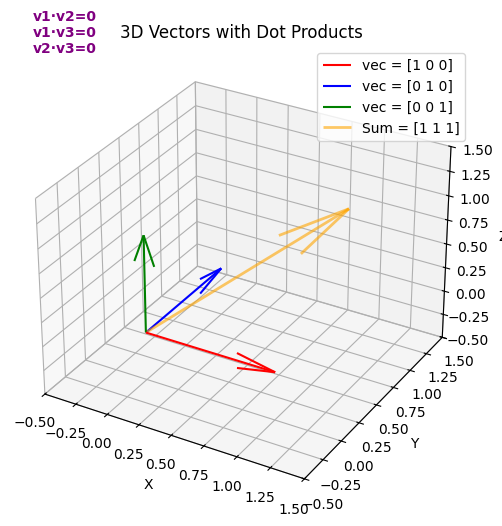

In [79]:
from mlpeople.math import plot_vectors_3d

# Example usage
u = np.array([1, 0, 0])
v = np.array([0, 1, 0])
w = np.array([0, 0, 1])

plot_vectors_3d(
    vectors=[u, v, w],
    show_sums=True,
    xlim=(-0.5, 1.5),
    ylim=(-0.5, 1.5),
    zlim=(-0.5, 1.5),
    title='3D Vectors with Dot Products'
)


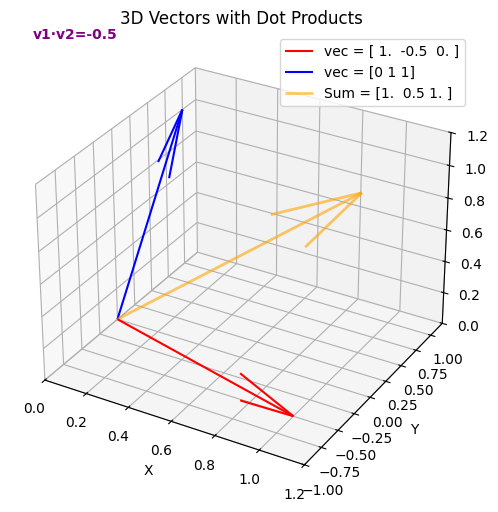

In [80]:
u = np.array([1, -0.5, 0])
v = np.array([0, 1, 1])

plot_vectors_3d(
    vectors=[u, v],
    show_sums=True,
    xlim=(0, 1.2),
    ylim=(-1, 1.2),
    zlim=(0, 1.2),
    title='3D Vectors with Dot Products'
)

## Linear Transformation (Matrix and vectors)

### On the same grid

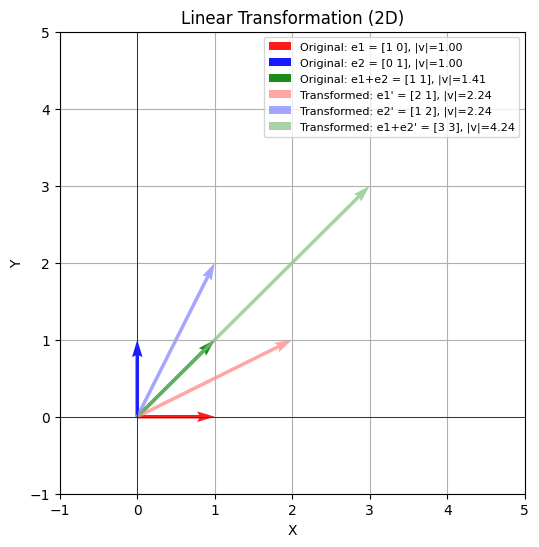

In [81]:
from mlpeople.math import plot_linear_transformation_2d

# Example usage
A = np.array([[2, 1],
              [1, 2]])

vectors = [np.array([1,0]), np.array([0,1]), np.array([1,1])]
labels = ['e1', 'e2', 'e1+e2']

plot_linear_transformation_2d(A, vectors, labels=labels, xlim=(-1,5), ylim=(-1,5))


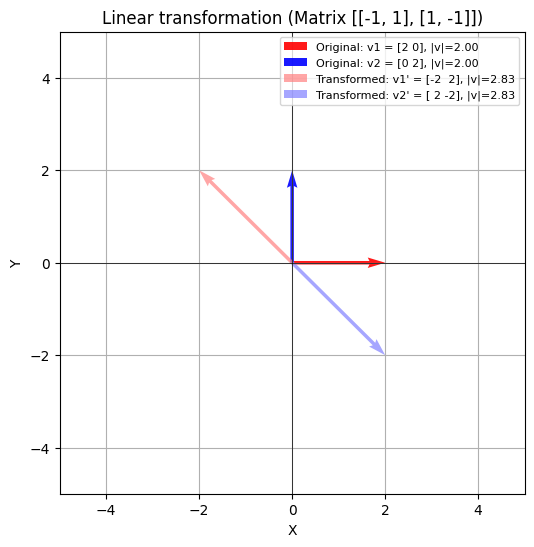

In [82]:
plot_linear_transformation_2d(
    np.array([[-1, 1], [1, -1]]),
    [np.array([2,0]), np.array([0,2])],
    title='Linear transformation (Matrix [[-1, 1], [1, -1]])'
)

### Grid Transformation

In [83]:
from mlpeople.math import plot_grid_transformation_2d

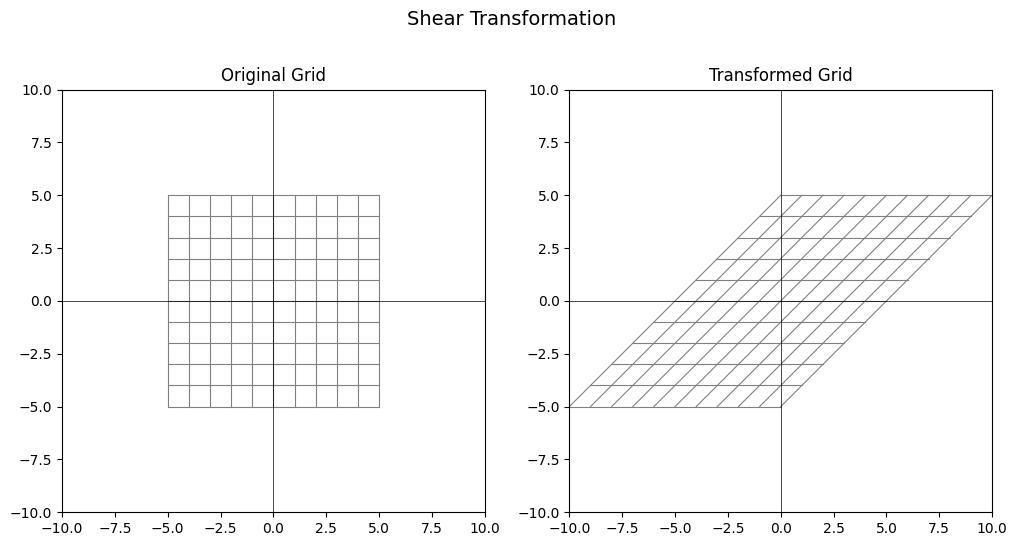

In [84]:
A = np.array([
    [1, 1],
    [0, 1]
])

plot_grid_transformation_2d(A, title='Shear Transformation')

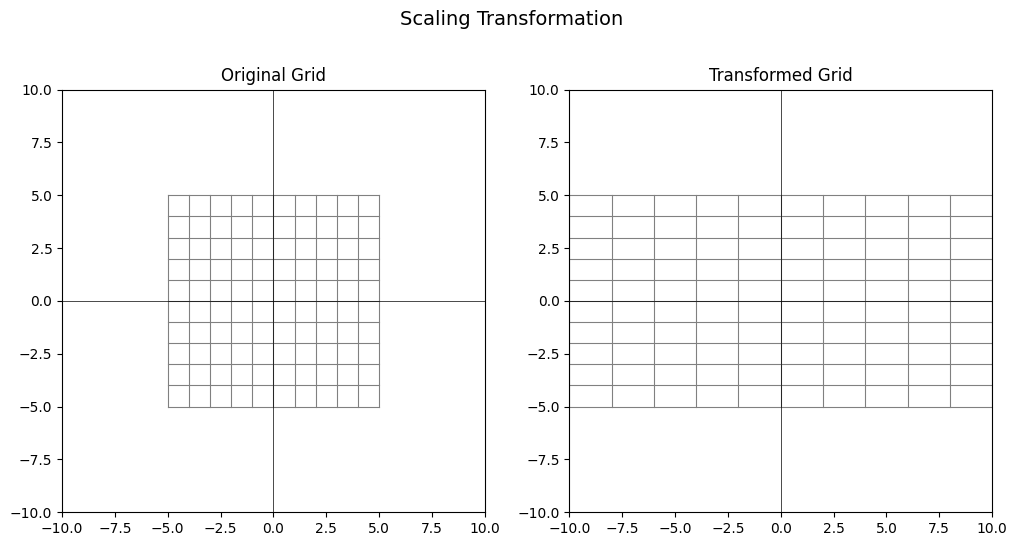

In [85]:
A = np.array([
    [2, 0],
    [0, 1]
])

plot_grid_transformation_2d(A, title='Scaling Transformation')

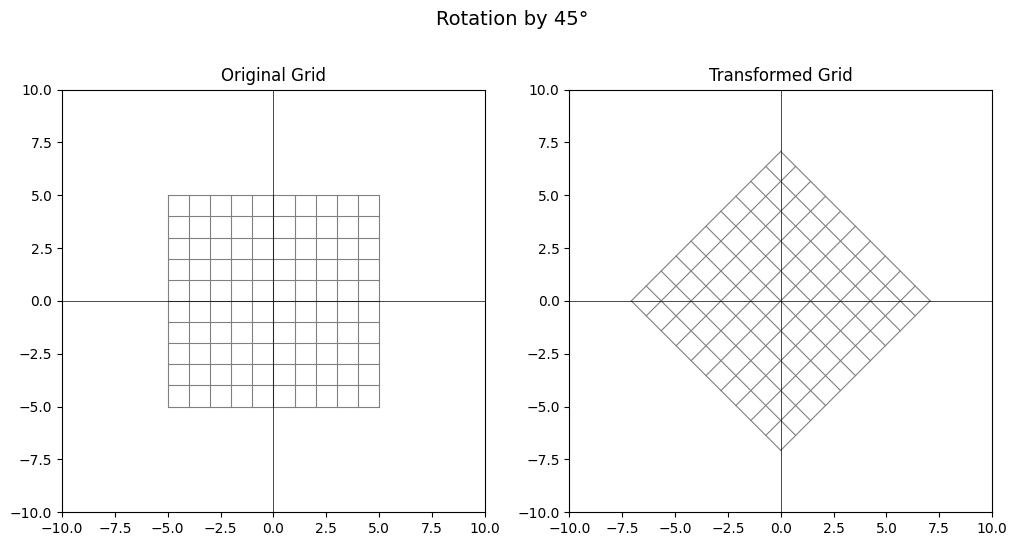

In [86]:
theta = np.pi / 4
A = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

plot_grid_transformation_2d(A, title='Rotation by 45°')

### Combine Grid and Vectors Transformation

In [87]:
from mlpeople.math import plot_linear_transformation_with_grid_2d

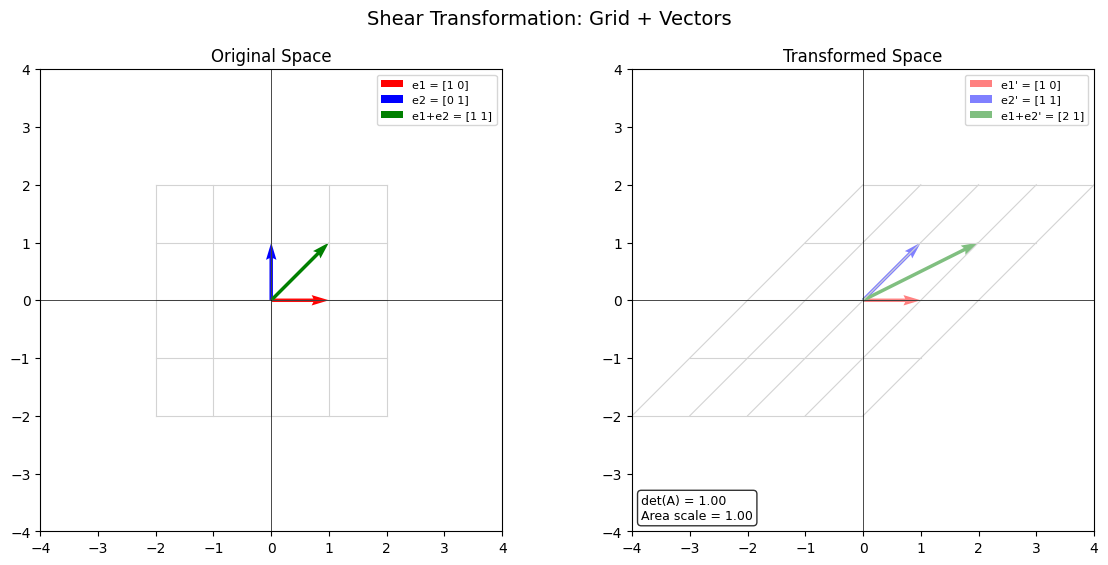

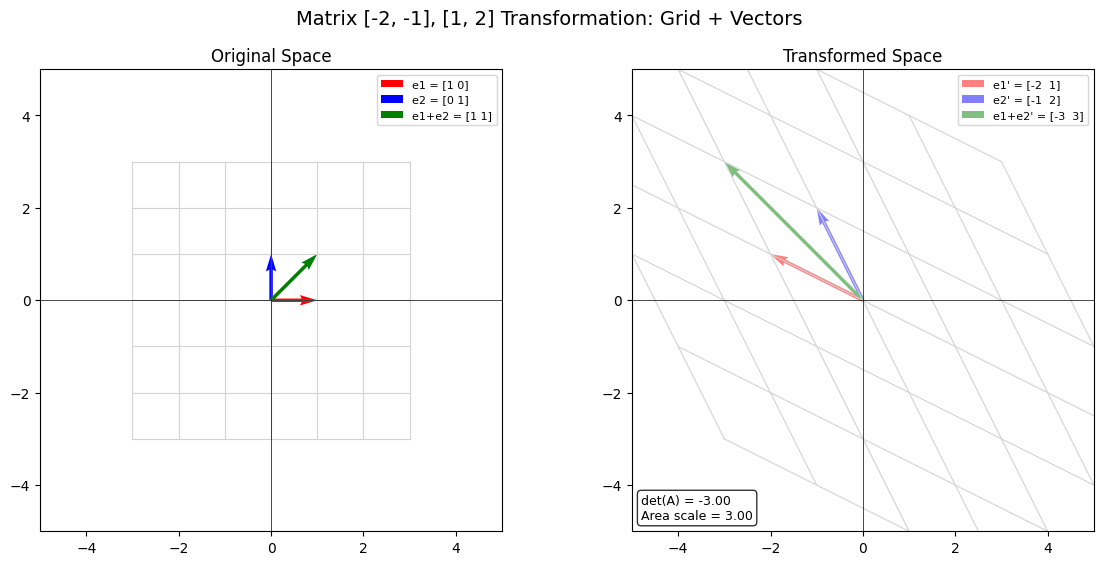

In [88]:
A = np.array([[1, 1],
              [0, 1]])

B = np.array([[-2, -1],
              [1, 2]])

vectors = [
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([1, 1])
]

labels = ['e1', 'e2', 'e1+e2']

plot_linear_transformation_with_grid_2d(
    A,
    vectors,
    labels=labels,
    grid_range=(-2, 2),
    xlim=(-4, 4),
    ylim=(-4, 4),
    title='Shear Transformation: Grid + Vectors'
)


plot_linear_transformation_with_grid_2d(
    B,
    vectors,
    labels=labels,
    grid_range=(-3, 3),
    xlim=(-5, 5),
    ylim=(-5, 5),
    title='Matrix [-2, -1], [1, 2] Transformation: Grid + Vectors'
)


### 3D Linear Transformation

In [89]:
from mlpeople.math import plot_linear_transformation_with_grid_3d

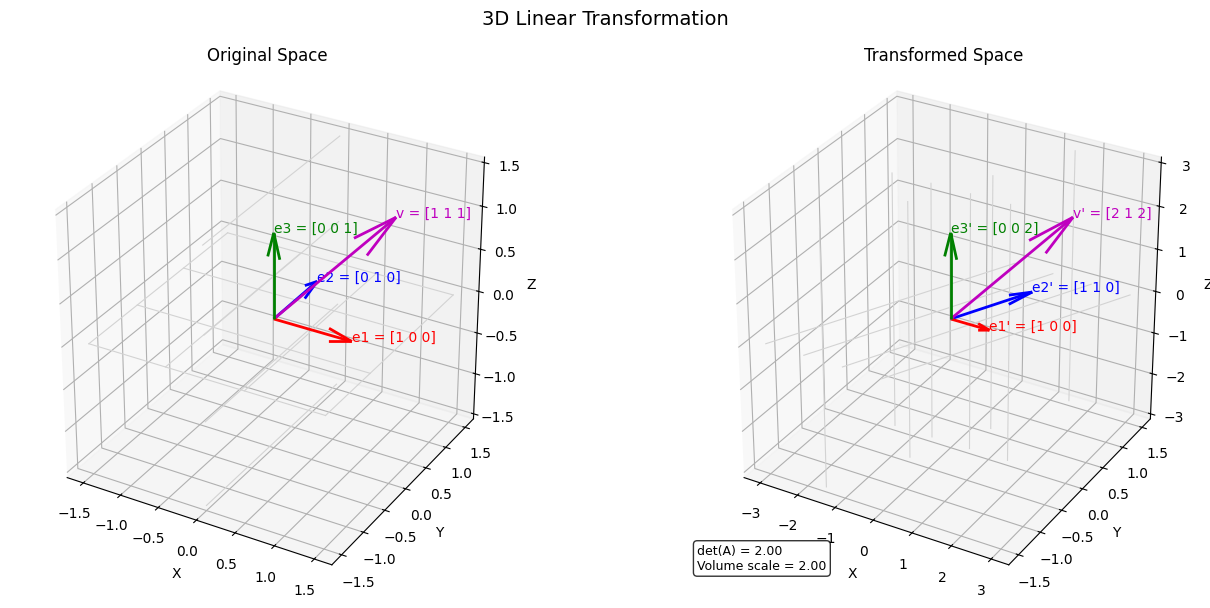

In [90]:
A = np.array([
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 2]
])

vectors = [
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1]),
    np.array([1, 1, 1])
]

labels = ["e1", "e2", "e3", "v"]

plot_linear_transformation_with_grid_3d(
    A,
    vectors,
    labels=labels,
    title="3D Linear Transformation",
    grid_range=(-1.5, 1.5),
)


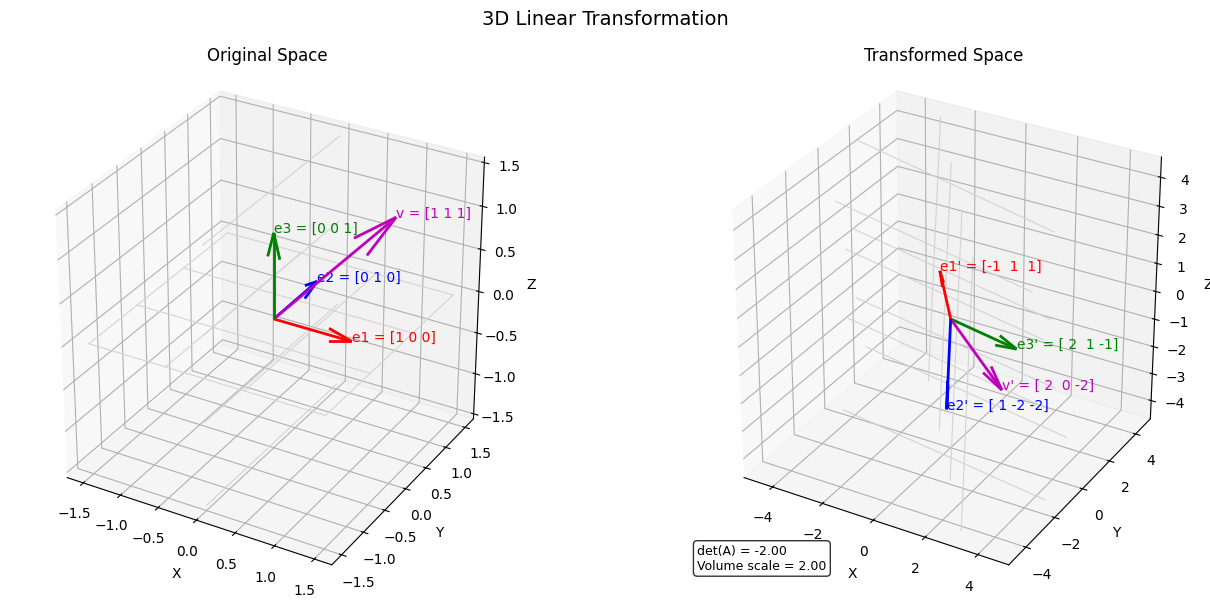

In [101]:
A = np.array([
    [-1, 1, 2],
    [1, -2, 1],
    [1, -2, -1]
])

vectors = [
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1]),
    np.array([1, 1, 1])
]

plot_linear_transformation_with_grid_3d(
    A,
    vectors,
    labels=labels,
    title="3D Linear Transformation",
    grid_range=(-1.5, 1.5),
)

## Decrease (Lower) dimensions 

### Linear transformation from 3D to 2D

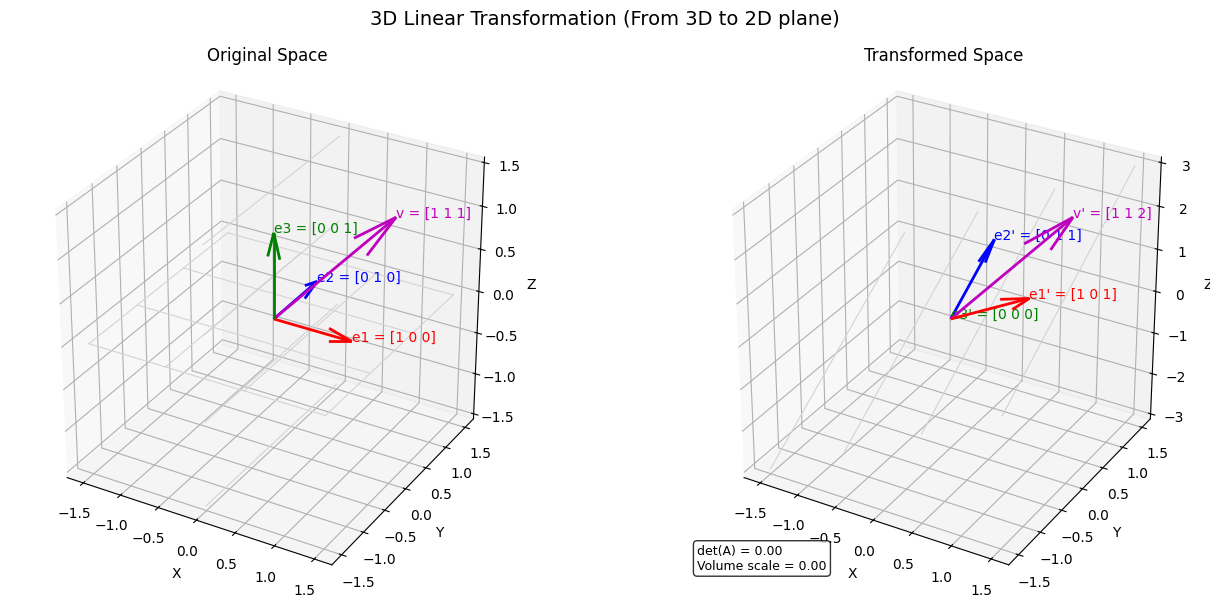

In [193]:
import numpy as np

# 3D → 2D transformation (collapse along one direction)
A = np.array([
    [1, 0, 0],  # X stays
    [0, 1, 0],  # Y stays
    [1, 1, 0]   # Z mapped onto XY plane
])

vectors = [
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1]),
    np.array([1, 1, 1])
]

plot_linear_transformation_with_grid_3d(
    A,
    vectors,
    labels=labels,
    title="3D Linear Transformation (From 3D to 2D plane)",
    grid_range=(-1.5, 1.5),
)

### From 3D to 1D line

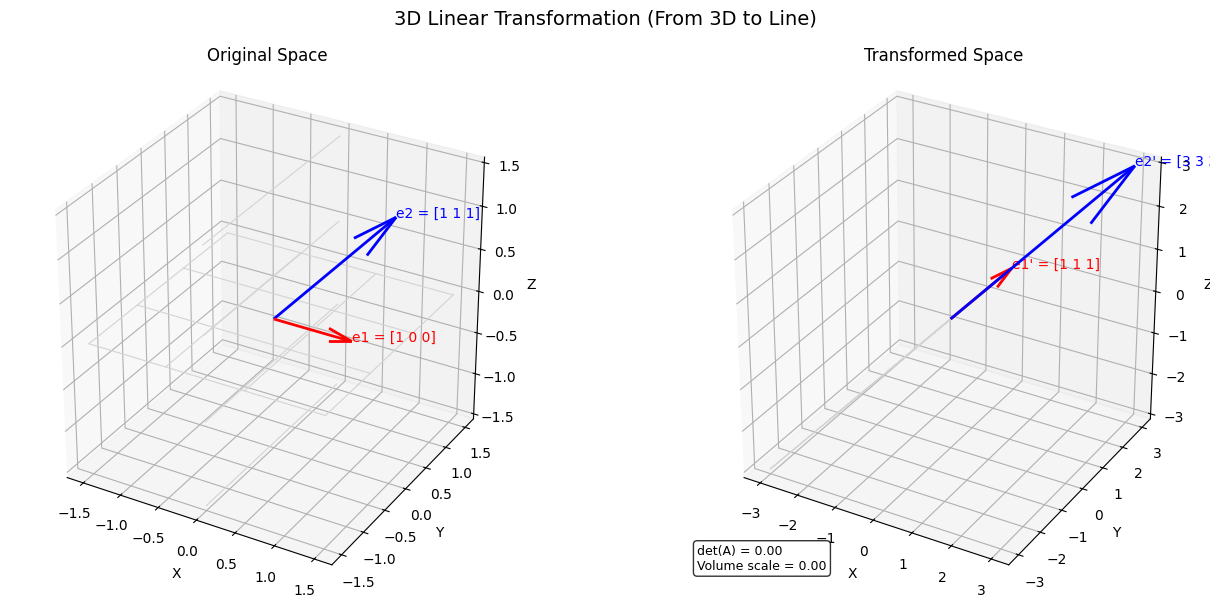

In [ ]:
A = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

vectors = [
    np.array([1, 0, 0]),
    np.array([1, 1, 1])
]

plot_linear_transformation_with_grid_3d(
    A,
    vectors,
    labels=labels,
    title="3D Linear Transformation (From 3D to Line)",
    grid_range=(-1.5, 1.5),
)

### Projection from 3D to 2D

In [232]:
from mlpeople.math import plot_dimension_reduction_3d_to_2d

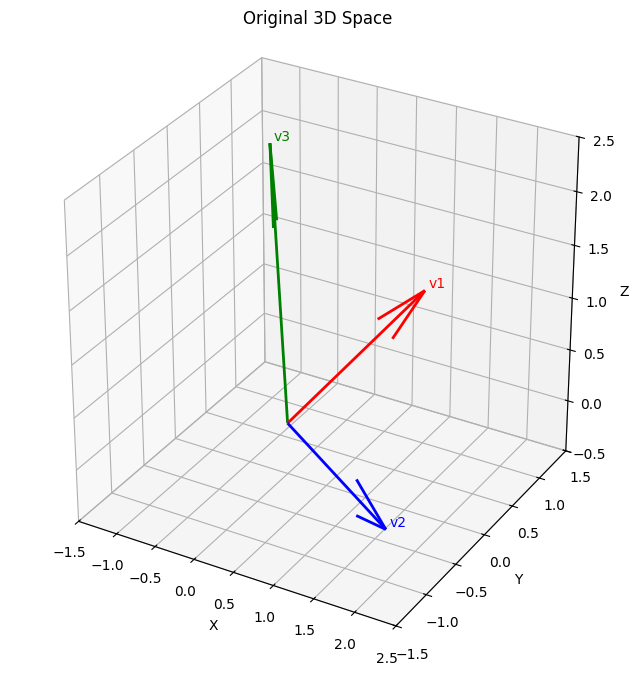

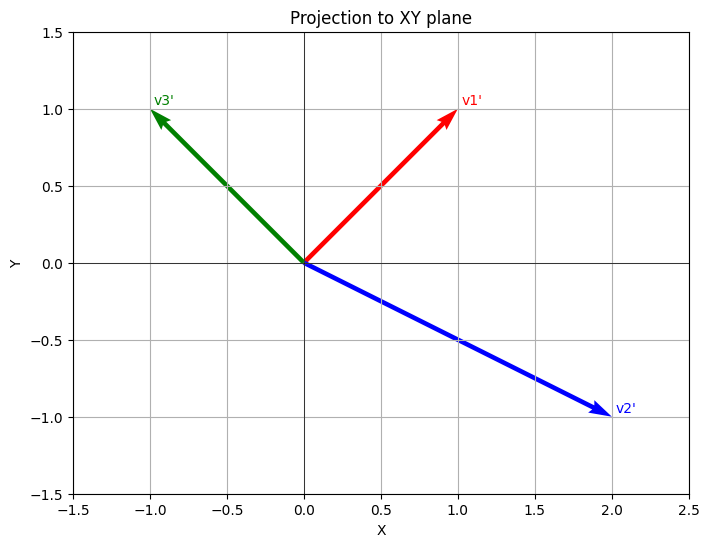

In [233]:
vectors = [
    np.array([1, 1, 1]),
    np.array([2, -1, 0]),
    np.array([-1, 1, 2])
]

# Projection dropping Z-axis
A = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

plot_dimension_reduction_3d_to_2d(A, vectors, scale_2d=1, title_2d='Projection to XY plane')


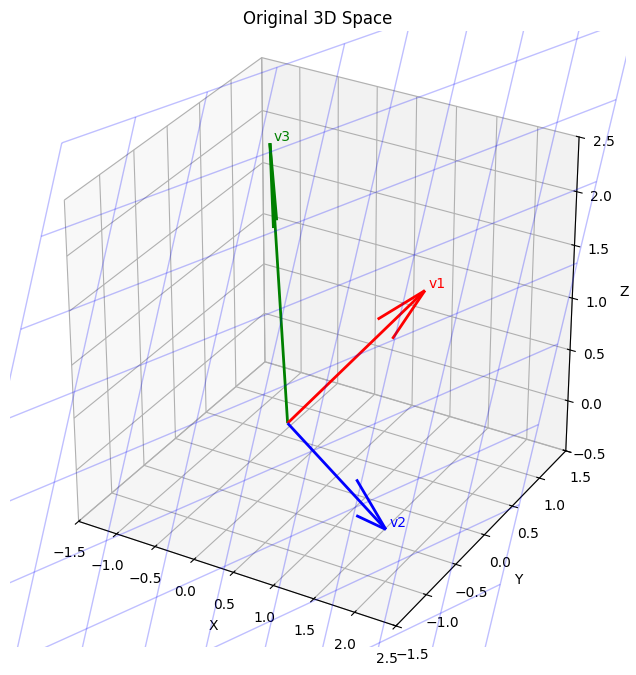

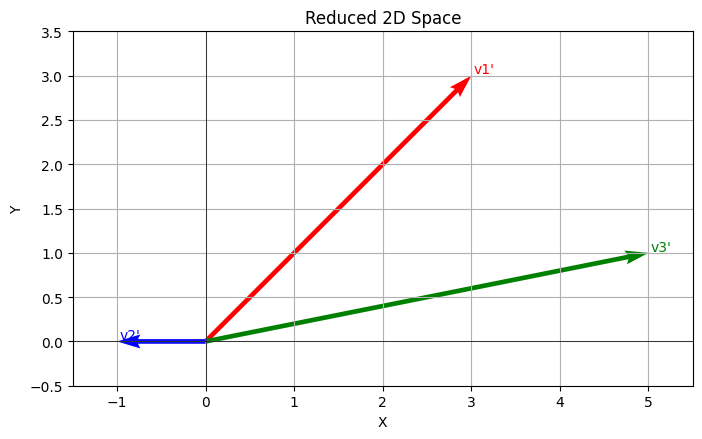

In [234]:
# Projection to something unknown
A = np.array([
    [0, 1, 2],
    [1, 2, 0]
])

plot_dimension_reduction_3d_to_2d(A, vectors, scale_2d=1, show_plane=True)

### Combine Linear Transformation and Projection from 3D to 2D

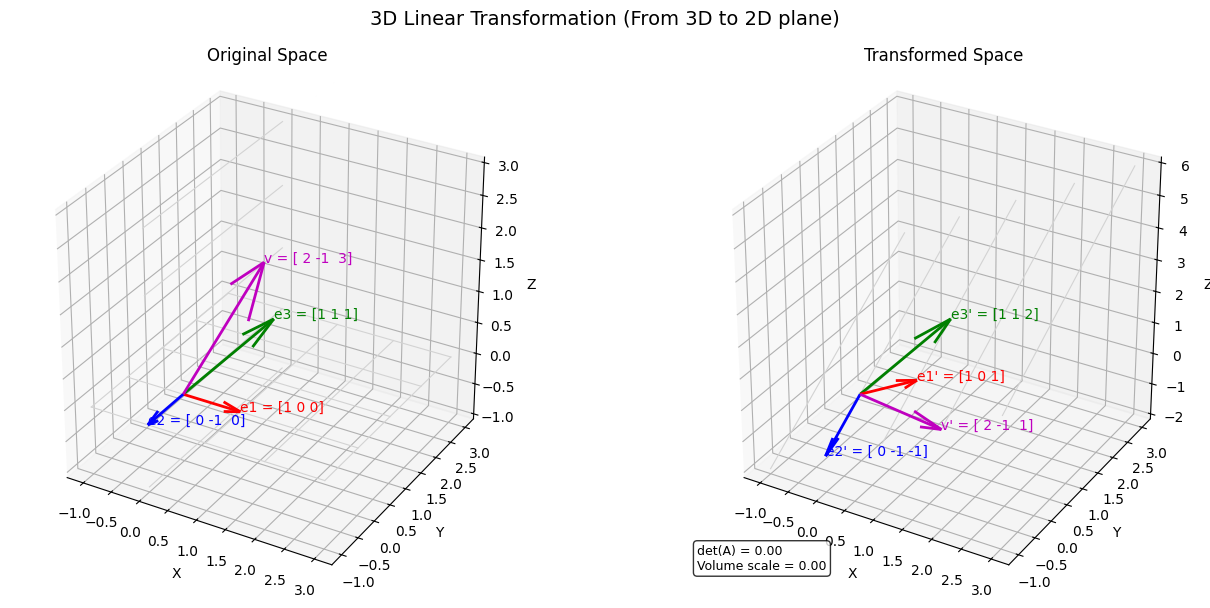

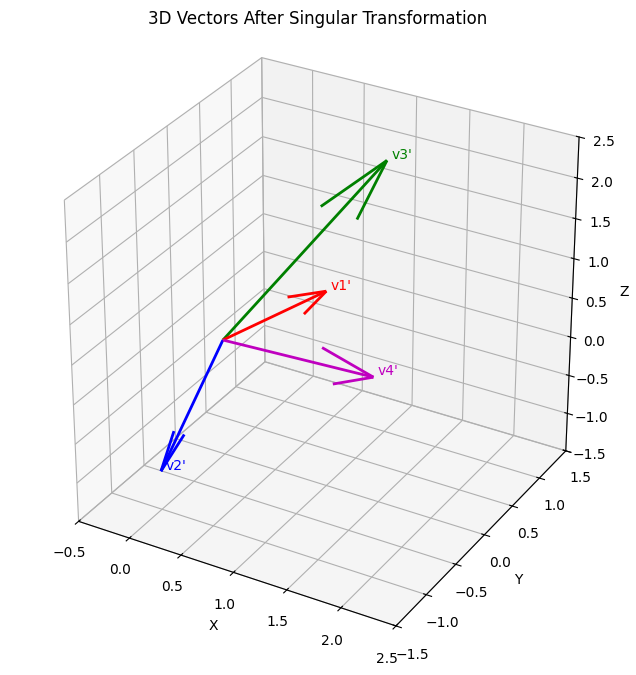

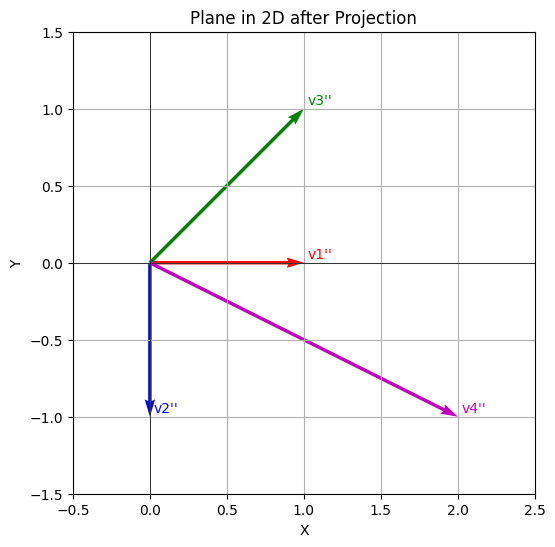

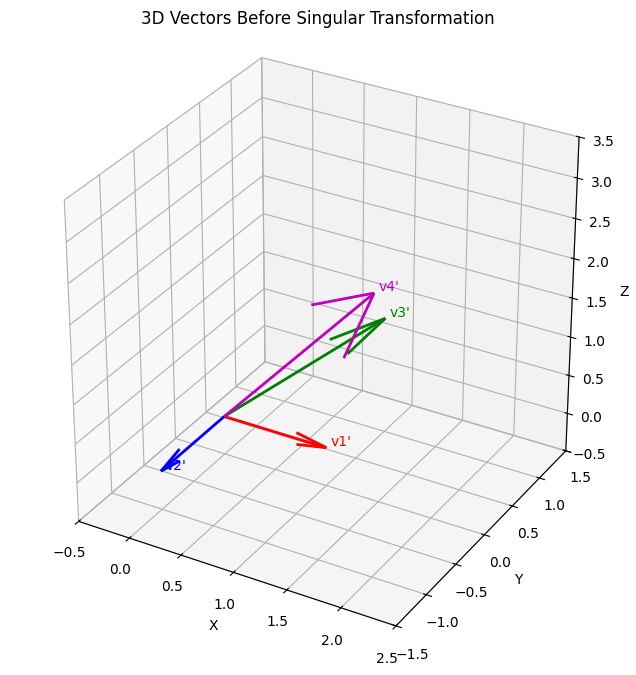

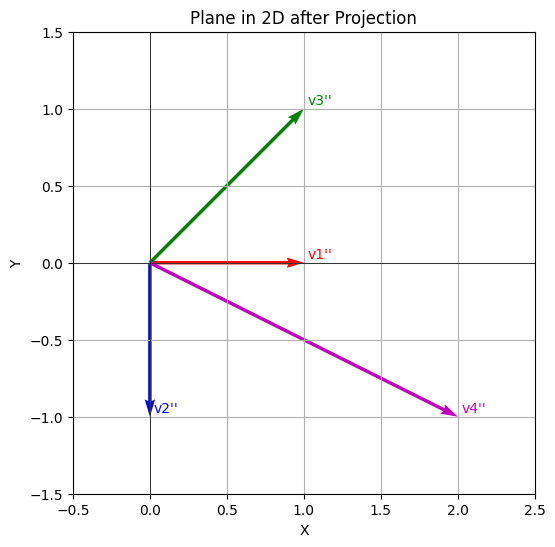

In [235]:
# Simple projection onto XY-plane for visualization
P = np.array([
    [1, 0, 0],  # X
    [0, 1, 0]   # Y
])

# 3D → 2D transformation (collapse along one direction)
A = np.array([
    [1, 0, 0],  # X stays
    [0, 1, 0],  # Y stays
    [1, 1, 0]   # Z mapped onto XY plane
])

vectors = [
    np.array([1, 0, 0]),
    np.array([0, -1, 0]),
    np.array([1, 1, 1]),
    np.array([2, -1, 3])
]

plot_linear_transformation_with_grid_3d(
    A,
    vectors,
    labels=labels,
    title="3D Linear Transformation (From 3D to 2D plane)",
    grid_range=(-1, 3),
)

# Apply singular transformation
transformed_vectors = [A @ v for v in vectors]
# print(transformed_vectors)

# Then project to 2D
# vectors_2d = [P @ v for v in transformed_vectors]
# Combine the singular transformation and 2D projection
plot_dimension_reduction_3d_to_2d(
    A=P,  # projection to 2D
    vectors=transformed_vectors,  # already transformed by A
    labels=["v1'", "v2'", "v3'", "v4'"],
    title_3d="3D Vectors After Singular Transformation",
    title_2d="Plane in 2D after Projection",
    scale_2d=1
)

plot_dimension_reduction_3d_to_2d(
    A=P,  # projection to 2D
    vectors=vectors,  # compare with not transformed - projection the same
    labels=["v1'", "v2'", "v3'", "v4'"],
    title_3d="3D Vectors Before Singular Transformation",
    title_2d="Plane in 2D after Projection",
    scale_2d=1
)
